In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


use_tex = False

if use_tex:
    width = 5.5  # 5.5 for producing plot for report
    height = width/1.5
    fsize = 10  # fontsize, 10 for producing plot for report
    font = {'family': 'Times New Roman', 'size': fsize}
else:
    width = 6
    height = width/1.5
    fsize = 16
    font = {'size': fsize}
    
mpl.rc('font', **font)
mpl.rc('xtick', labelsize=fsize)
mpl.rc('ytick', labelsize=fsize)
mpl.rc('text', usetex=use_tex)

# Problem Set 3
## Learning from data [TIF285], Chalmers, Fall 2019

Last revised: 09-Oct-2019 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions

- See deadline on the course web page
- This problem set is performed individually (but collaboration is encouraged) and contains a number of basic and extra problems; you can choose which and how many to work on.
- See examination rules on the course web page.
- Hand-in is performed through the following **two** actions:
  - Upload of your solution in the form of a jupyter notebook, or python code, via Canvas.
  - Answer the corresponding questions on OpenTA.
  
  Note that the hand-in is not complete, and will not be graded, if any of those actions is not performed.

Fill your personal details
- Name: **Jacobsson, Simon**
- Personnummer: **970417-0456**
  <br/>
  (civic registration number)

## Problems
The 10 basic points of this problem set are distributed over four problems:
1. Assigning probabilities for a hundred-sided die (2 basic points)
2. Chi-squared hypothesis testing (2 basic points)
3. Gaussian process regression (3 basic points)
4. Neural network classification (3 basic points)

Each of them will be presented in a separate jupyter notebook.

## Problem 2: Chi-squared hypothesis testing
### (2 basic points)

Assume that you are analyzing a time series of data from an experiment that is searching for an annual modulation on top of a constant background (e.g. a modulation that would be proportional to the flux of dark matter particles which is expected to have an annual modulation). 

The time series of data consists of $N = 20$ measurements that extends over a period of 5 years. The measurements are presented in some re-scaled, dimensionless units. From calibration measurements it is known that errors are statistically distributed with a standard variance $\sigma = 5.0$.

### Tasks
* Create data according to the cell below using three different scenarios: the amplitude of the annual modulation signal (as given by the `amp_annual` variable) being 
  * 0.0
  * 5.0
  * 10.0
* Consider as a null hypothesis that the signal is *constant*, with an unknown amplitude.
* Compute, for each case, the chi-squared statistics: $\chi^2 = \sum_{i=1}^N \frac{( y_i - \bar{y} )^2}{\sigma^2}$, where the average value $\bar{y}$ is estimated from the sample $\{ y_i \}_{i=1}^{N}$.
* Make a plot of the expected $\chi^2$ distribution for the relevant number of degrees of freedom and compare with the statistic obtained for the actual data in each case.
* What is the *P-value* or *significance* of the data (for each case) from a frequentist point of view?
* What is your *confidence in rejecting the null hypothesis* for each particular case.

Finally, you are encouraged to play around and generate data for the same three scenarios but with another random seed. E.g. try with the seed `2019` instead of `1` used in the `np.random.RandomState(1)` initialization in the cell below. What is the outcome of the analysis of these new data sets?

In [2]:
# Generate N=20 data points for a period of Y=5 years
N = 20
Y = 5
T = 365.25
rand = np.random.RandomState(1)
t = T * Y * rand.rand(N)

# The constant background
background = 100.

# The std deviation for the normally distributed errors
dy = 5.

# amplitude of annual modulation signal
amps_annual = [0., 5., 10.]

ys = [background + amp_annual * np.sin(2*np.pi*t / T) + dy * rand.randn(N) for amp_annual in amps_annual]

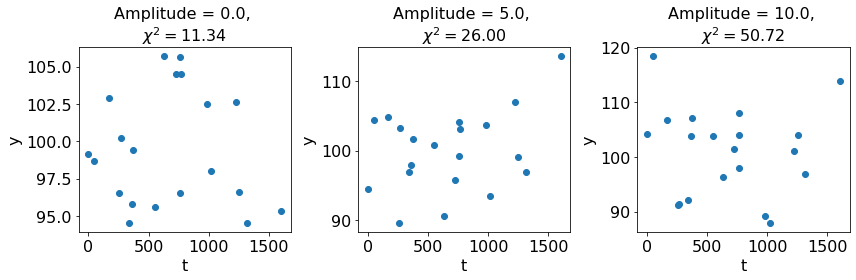

In [3]:
chi2s = [] #initiate
fig, axii = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for ax, y, amp in zip(axii, ys, amps_annual):
    ax.plot(t, y, 'o')
    ax.set_xlabel(r't', fontsize=fsize)
    ax.set_ylabel(r'y', fontsize=fsize)

    chi2 = np.sum((y - np.mean(y))**2 / dy**2)
    chi2s.append(chi2) # save for later 
    ax.set_title(f'Amplitude = {amp}, \n' + '$\chi^2 = $' + f'{chi2:.2f}', fontsize=fsize)

plt.tight_layout()
plt.show()

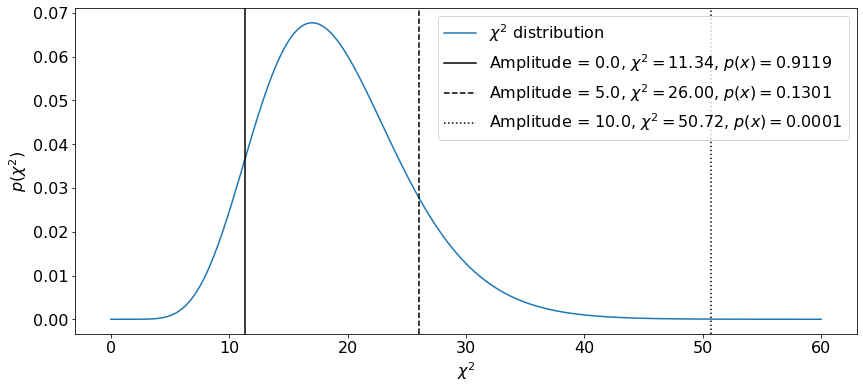

In [4]:
dof = len(y) - 1
x = np.linspace(0., 60., 300)
p = stats.chi2.pdf(x, dof)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(x, p, label=r'$\chi^2$ distribution')
ax.set_xlabel(r'$\chi^2$', fontsize=fsize)
ax.set_ylabel(r'$p(\chi^2)$', fontsize=fsize)

linestyles = ['-', '--', ':']
for chi2, linestyle, amp in zip(chi2s, linestyles, amps_annual):
    p_value = 1 - stats.chi2.cdf(chi2, dof)
    ax.axvline(chi2, color='k',
               linestyle=linestyle,
               label=f'Amplitude = {amp}, ' + r'$\chi^2 = $' + f'{chi2:.2f}, ' + r'$p(x) = $' + f'{p_value:.4f}',
               zorder=2)
    
plt.legend(fontsize=fsize)
plt.show()

Confidence in rejecting the null hypothesis, $H_0$, is the p-value - 1. In the case `amp_annual` = 0 or `amp_annual` = 5, we can not toss $H_0$. In the case `amp_annual` = 10, we can fairly confidently toss $H_0$